In [449]:
%matplotlib
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

import numpy as np
import pandas as pd
import re

Using matplotlib backend: QtAgg


In [450]:
def parseResult(filename):
    x1, x2 = [], []
    with open(filename) as f:
        lines = f.readlines()
    lines = lines[2:len(lines):5]
    
    for line in lines:
        x1.append(line.split()[0])
        x2.append(line.split()[1])
        
    return np.array(x1).astype(float), np.array(x2).astype(float)

def drawCircle(x, y, radius, ax):
    ax.add_patch(plt.Circle((x, y), radius, alpha=0.7, color='k', fill=False, lw=1.6))
    
def drawLine(x1, y1, x2, y2):
    plt.axline((x1, y1), (x2, y2), alpha=0.7, color='k', lw=1.6)
    
def drawSine(a, b):
    x = np.linspace(a, b, 100)
    plt.plot(x, np.sin(x), alpha=0.7, color='k', lw=1.6)

def drawContour(X, Y, Z, ax):
    ax.scatter(X, Y, c=Z, cmap='Blues', s=160, marker=',')

def addContour(plotType, ax, minX, maxX, minY, maxY):      
    X, Y, Z1, Z2, Z3 = [], [], [], [], []
            
    if plotType == 'IntersectingCirclesAtPoint': 
        for i in range(int(int(minX*11)), int(int(maxX*11))):
            for j in range(int(int(minY*11)), int(int(maxY*11))):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(pow(i + 2, 2) + pow(j - 2, 2) - 4)) 
                Z2.append(np.linalg.norm(pow(i - 2, 2) + pow(j - 2, 2) - 4)) 
    elif plotType == 'IntersectingCircles': 
        for i in range(int(minX*11), int(maxX*11)):
            for j in range(int(minY*11), int(maxY*11)):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(pow(i + 1, 2) + pow(j - 2, 2) - 4)) 
                Z2.append(np.linalg.norm(pow(i - 1, 2) + pow(j - 2, 2) - 4))
    elif plotType == 'IntersectionOfCirclesWithLine': 
        for i in range(int(minX*11), int(maxX*11)):
            for j in range(int(minY*11), int(maxY*11)):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(pow(i + 1, 2) + pow(j - 2, 2) - 4)) 
                Z2.append(np.linalg.norm(pow(i - 1, 2) + pow(j - 2, 2) - 4)) 
                Z3.append(np.linalg.norm(i + j -2))                 
    elif plotType == 'IntersectingLines': 
        for i in range(int(minX*11), int(maxX*11)):
            for j in range(int(minY*11), int(maxY*11)):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(i + j - 4)) 
                Z2.append(np.linalg.norm(i)) 
                Z3.append(np.linalg.norm(j))                          
    elif plotType == 'IntersectingLines_WithWeight': 
        for i in range(int(minX*11), int(maxX*11)):
            for j in range(int(minY*11), int(maxY*11)):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(-2*(i + j - 4))) 
                Z2.append(np.linalg.norm(i))
                Z3.append(np.linalg.norm(j - 4))
    elif plotType == 'IntersectingLinesWithSineWave': 
        for i in range(int(minX*11), int(maxX*11)):
            for j in range(int(minY*11), int(maxY*11)):
                X.append(i / 10.0)
                Y.append(j / 10.0)
                Z1.append(np.linalg.norm(np.sin(i) - j)) 
                Z2.append(np.linalg.norm(i - j + 1)) 

    if 'Z3' in locals(): drawContour(X, Y, Z1, ax), drawContour(X, Y, Z2, ax), drawContour(X, Y, Z3, ax)
    else: drawContour(X, Y, Z1, ax), drawContour(X, Y, Z2, ax)

def makePlot(x1, x2, plotType, minX, maxX, minY, maxY, startPoint):
    fig, ax = plt.subplots(figsize=(20, 10))   
    
    if plotType == 'IntersectingCirclesAtPoint': addContour(plotType, ax, minX, maxX, minY, maxY), drawCircle(-2, 2, 2, ax), drawCircle(2, 2, 2, ax)
    elif plotType == 'IntersectingCircles': addContour(plotType, ax, minX, maxX, minY, maxY), drawCircle(-1, 2, 2, ax), drawCircle(1, 2, 2, ax)
    elif plotType == 'IntersectionOfCirclesWithLine': addContour(plotType, ax, minX, maxX, minY, maxY), drawCircle(-2, 2, 2, ax), drawCircle(2, 2, 2, ax), drawLine(0, 2, 2, 0)
    elif plotType == 'IntersectingLines': addContour(plotType, ax, minX, maxX, minY, maxY), drawLine(0, 4, 4, 0), drawLine(1, 0, -1, 0), drawLine(0, 1, 0, -1)
    elif plotType == 'IntersectingLines_WithWeight': addContour(plotType, ax, minX, maxX, minY, maxY), drawLine(0, 4, 4, 0), drawLine(1, 4, -1, 4), drawLine(0, 1, 0, -1)
    elif plotType == 'IntersectingLinesWithSineWave': addContour(plotType, ax, minX, maxX, minY, maxY), drawSine(-3, 3), drawLine(0, 1, -1, 0)

    plt.axline((0, 0), (1, 0), alpha=0.3, color='k', lw=0.5)
    plt.axline((0, 0), (0, 1), alpha=0.3, color='k', lw=0.5) 
    plt.scatter(x1, x2, s=100, c='grey', alpha=0.8, edgecolor='k')
    plt.plot(x1, x2, 'r-', lw=4)
    
    plt.xlim([minX, maxX])
    plt.ylim([minY, maxY])
    
    x, y = startPoint
    plt.scatter(x, y, s=65, c='k')
    plt.text(x, y, ' ('+', '.join([str(value) for value in startPoint])+')', size=30)
    
    ax.set_aspect(1)

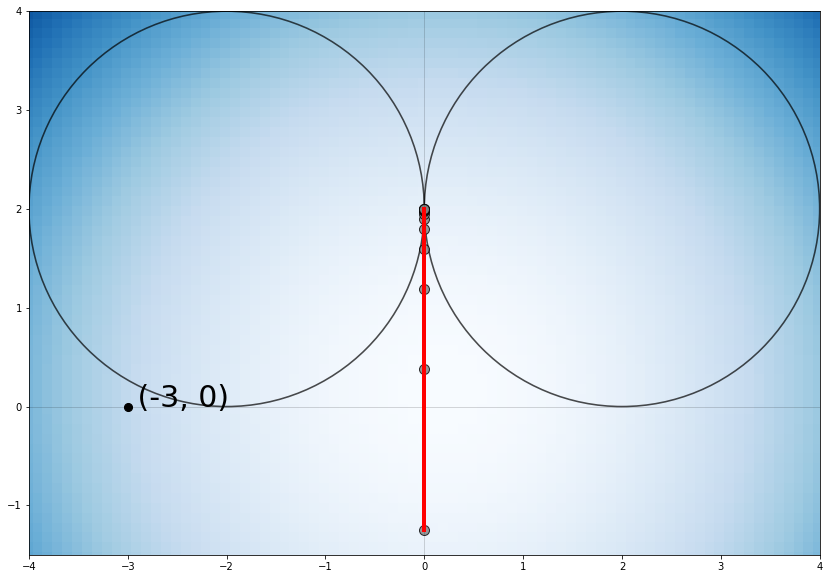

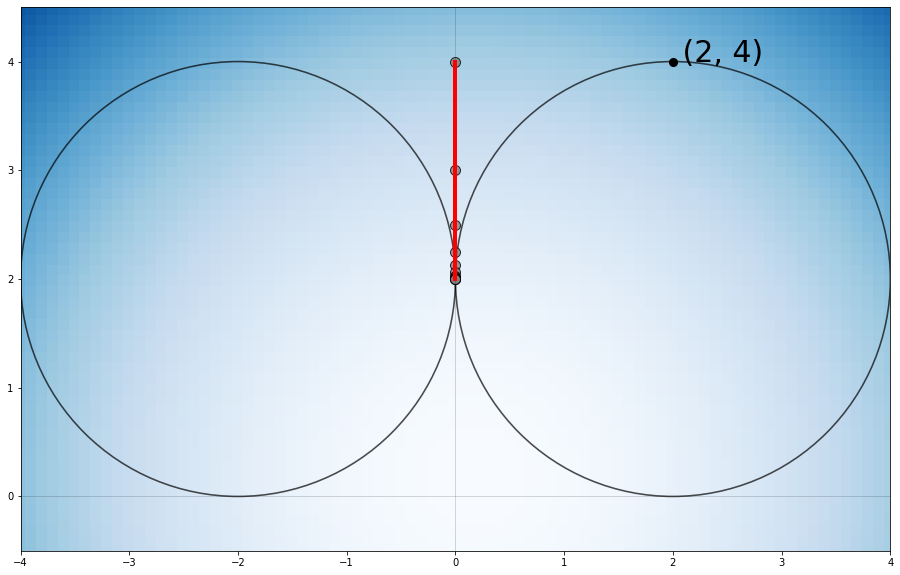

In [451]:
x1, x2 = parseResult('data/circles_at_point_-3_0.txt')
makePlot(x1, x2, 'IntersectingCirclesAtPoint', -4, 4, -1.5, 4, (-3, 0))

#x1, x2 = parseResult('data/circles_at_point_-2_2.txt')
#makePlot(x1, x2, 'IntersectingCirclesAtPoint', -4, 4, -1, 6, (-2, 2))

x1, x2 = parseResult('data/circles_at_point_2_4.txt')
makePlot(x1, x2, 'IntersectingCirclesAtPoint', -4, 4, -0.5, 4.5, (2, 4))

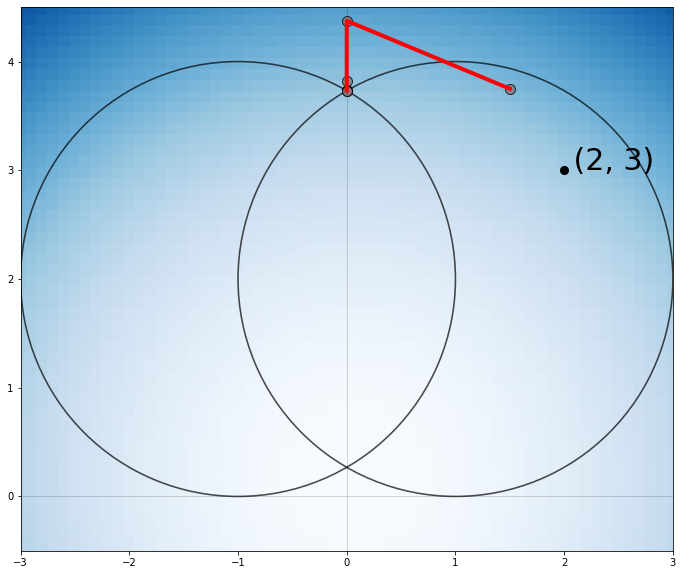

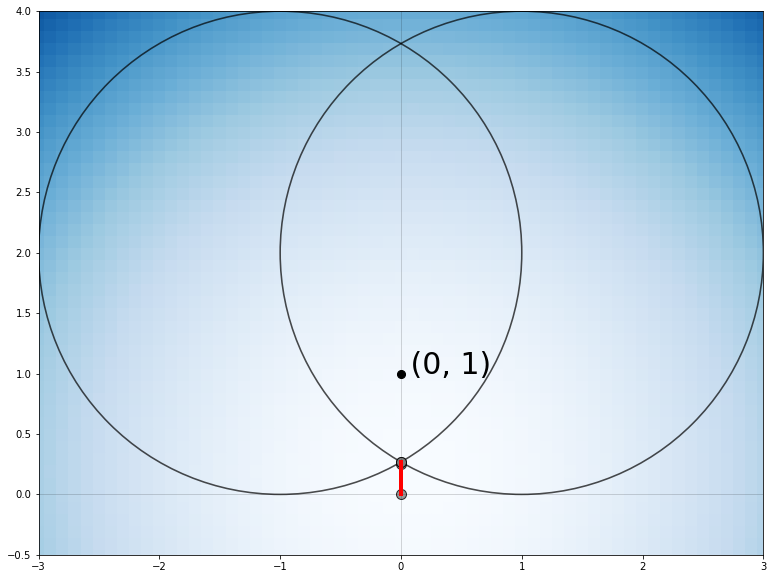

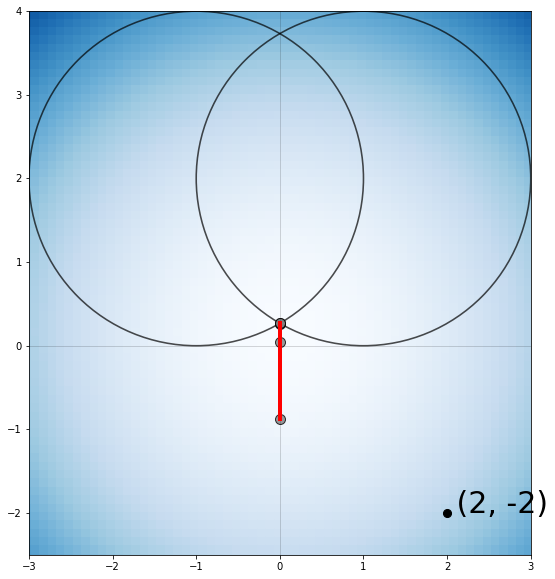

In [452]:
x1, x2 = parseResult('data/intersecting_circles_2_3.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3, -0.5, 4.5, (2, 3))

x1, x2 = parseResult('data/intersecting_circles_0_1.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3, -0.5, 4, (0, 1))

#x1, x2 = parseResult('data/intersecting_circles_1_2.txt')
#makePlot(x1, x2, 'IntersectingCircles', -4, 4, -1, 4, (1, 2))

x1, x2 = parseResult('data/intersecting_circles_2_-2.txt')
makePlot(x1, x2, 'IntersectingCircles', -3, 3, -2.5, 4, (2, -2))

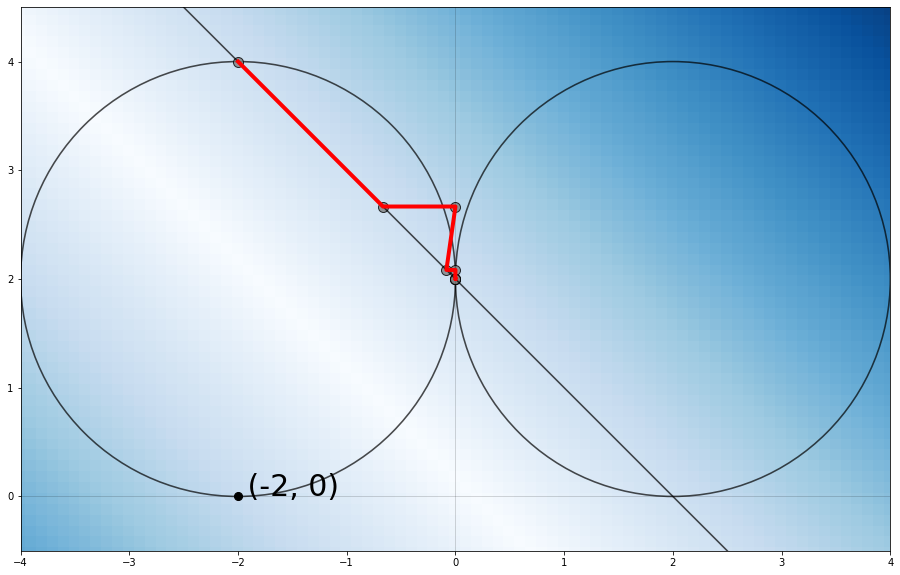

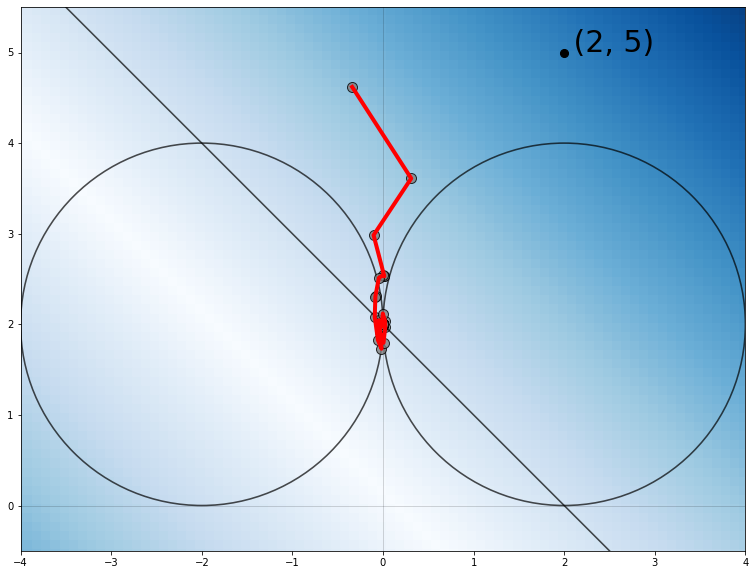

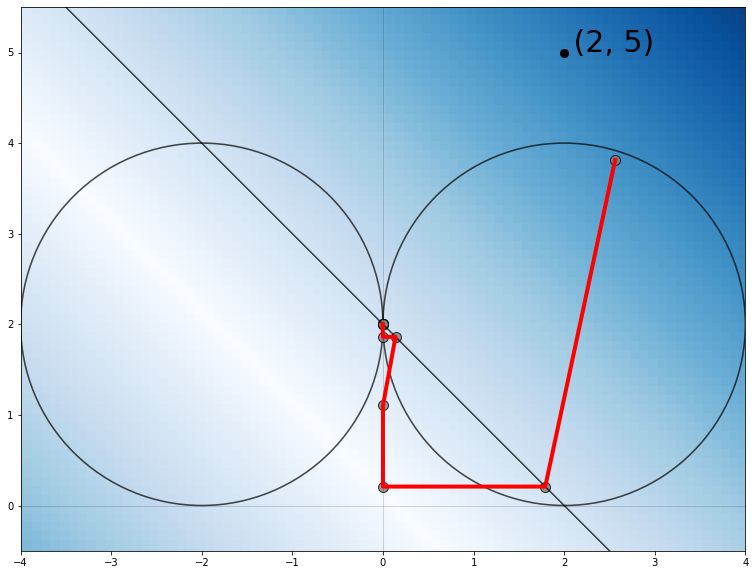

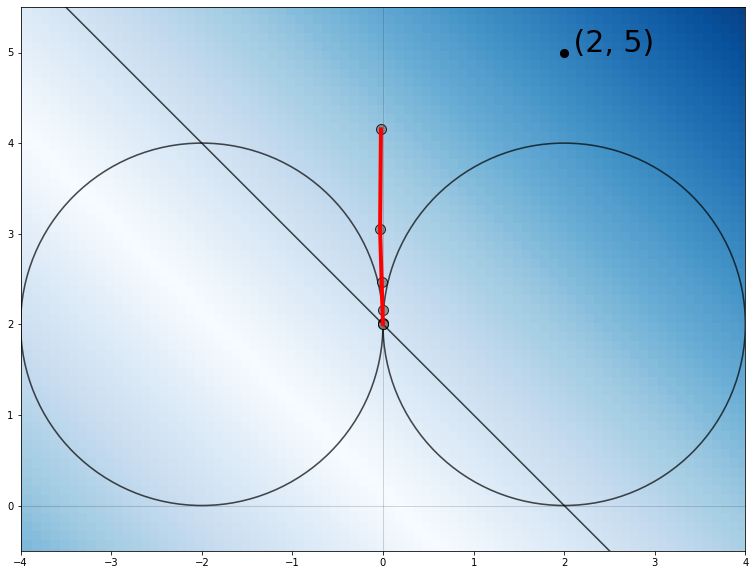

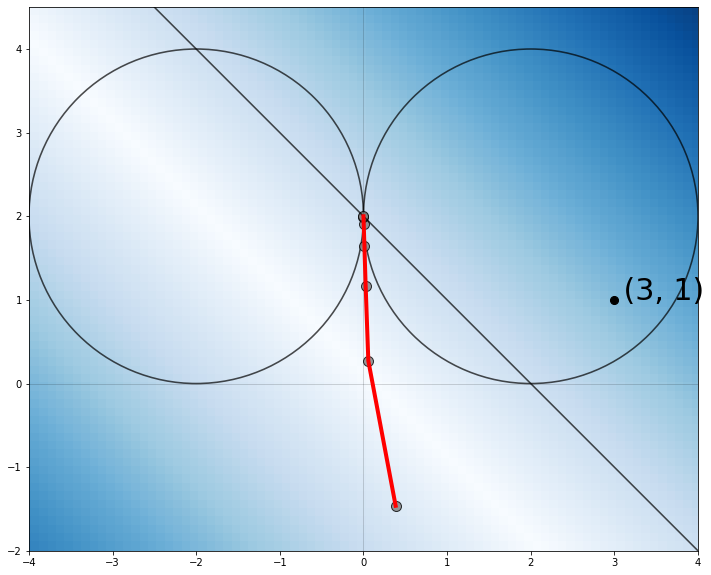

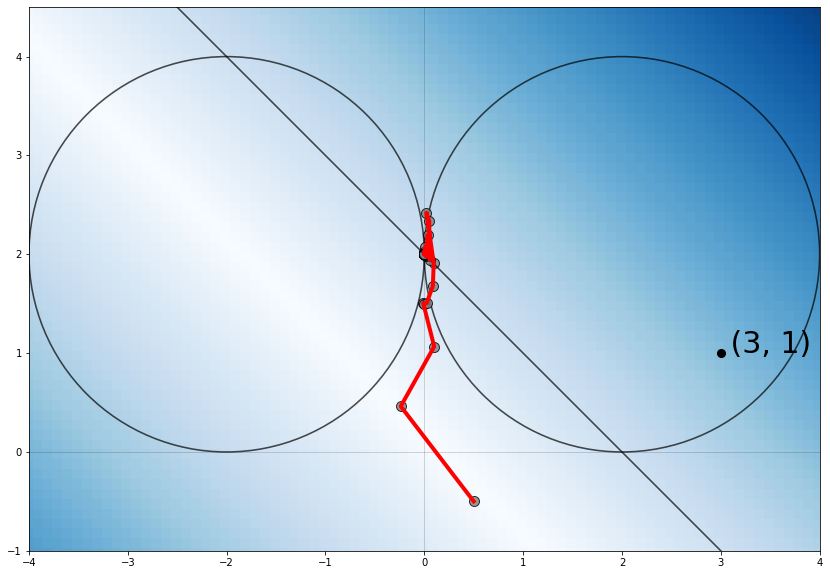

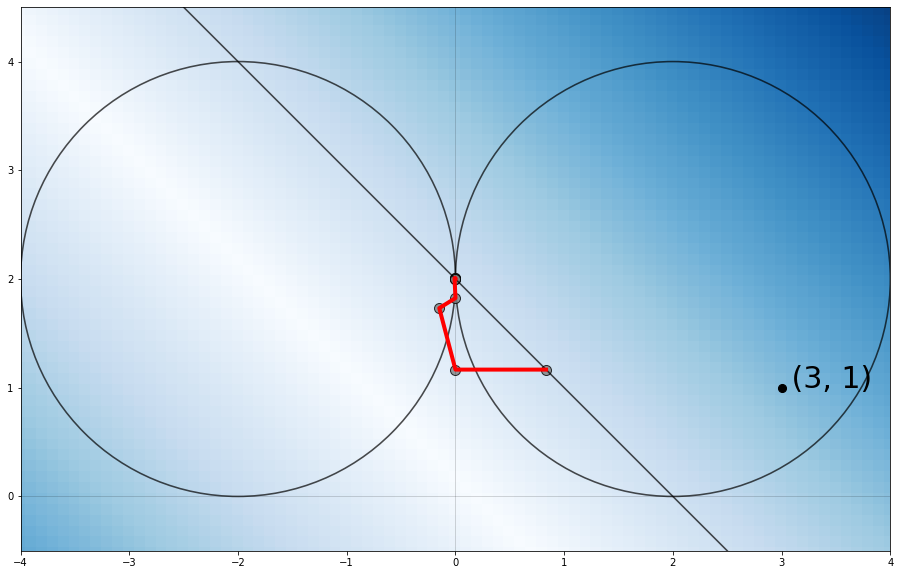

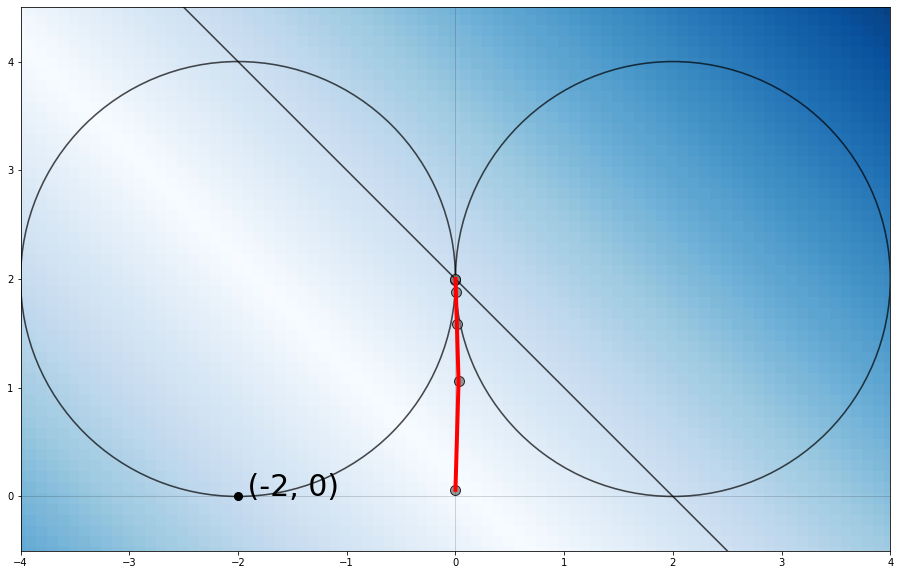

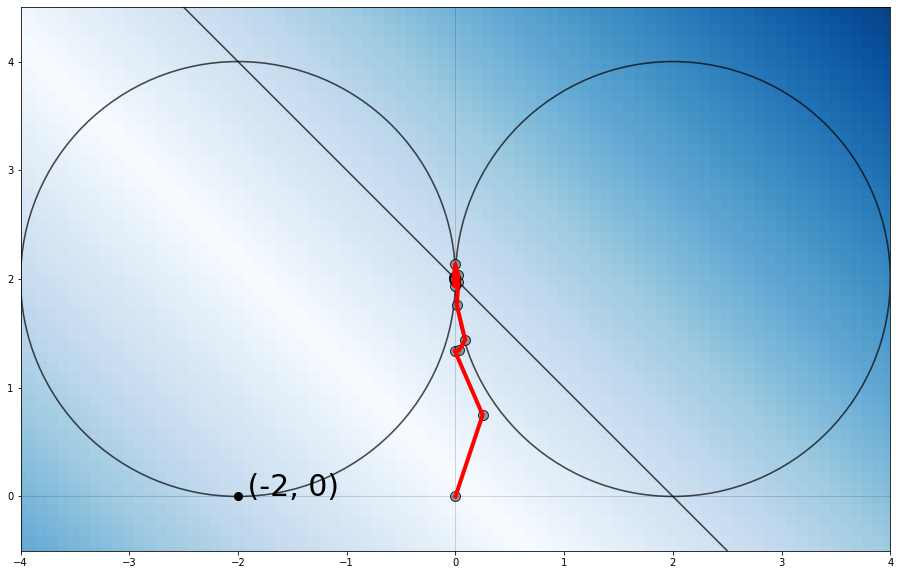

In [453]:
x1, x2 = parseResult('data/circles_with_line_-2_0_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

x1, x2 = parseResult('data/circles_with_line_2_5_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_2_5_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_2_5_symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 5.5, (2, 5))

x1, x2 = parseResult('data/circles_with_line_3_1__symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -2, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_3_1_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -1, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_3_1_excluding_rows.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (3, 1))

x1, x2 = parseResult('data/circles_with_line_-2_0__symmetrization.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

x1, x2 = parseResult('data/circles_with_line_-2_0_convolution.txt')
makePlot(x1, x2, 'IntersectionOfCirclesWithLine', -4, 4, -0.5, 4.5, (-2, 0))

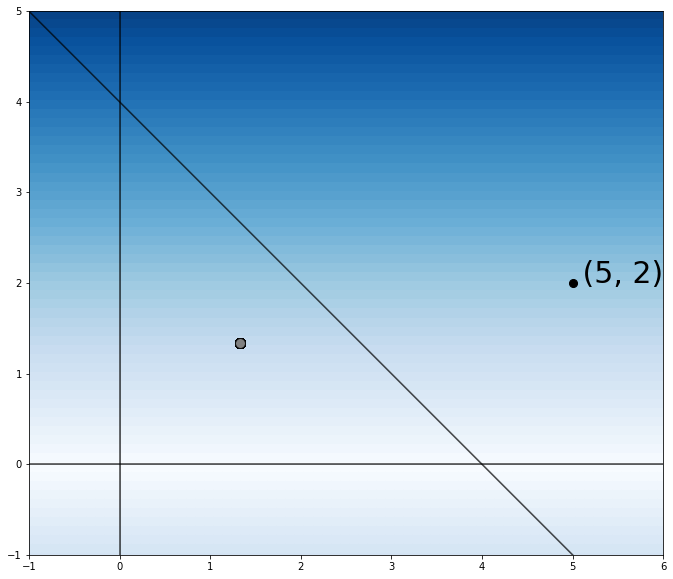

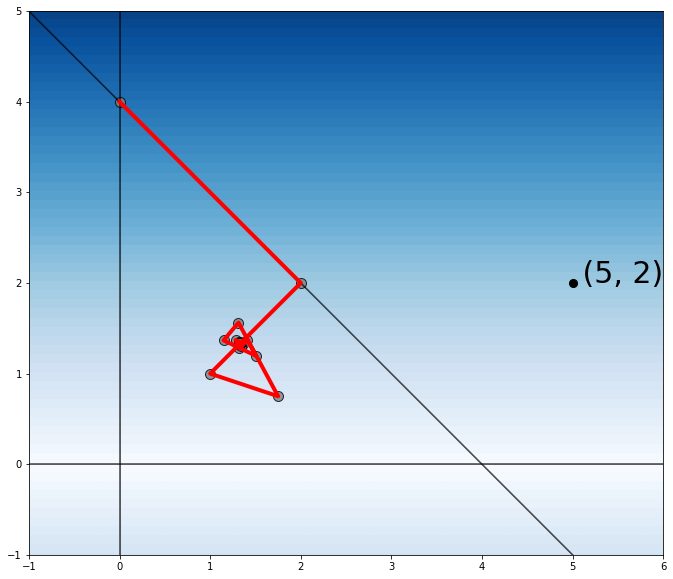

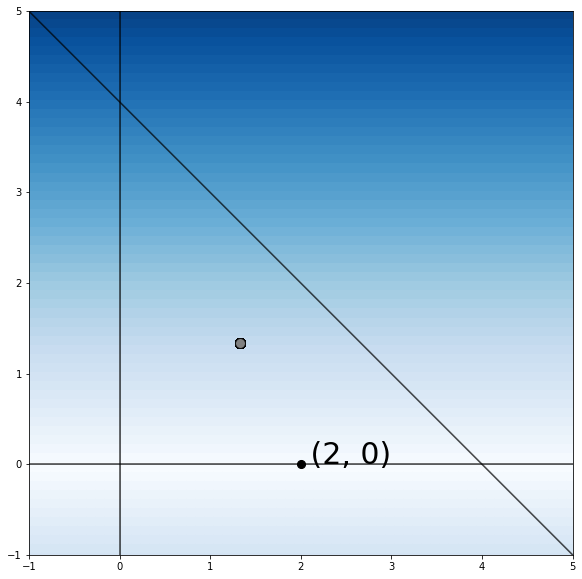

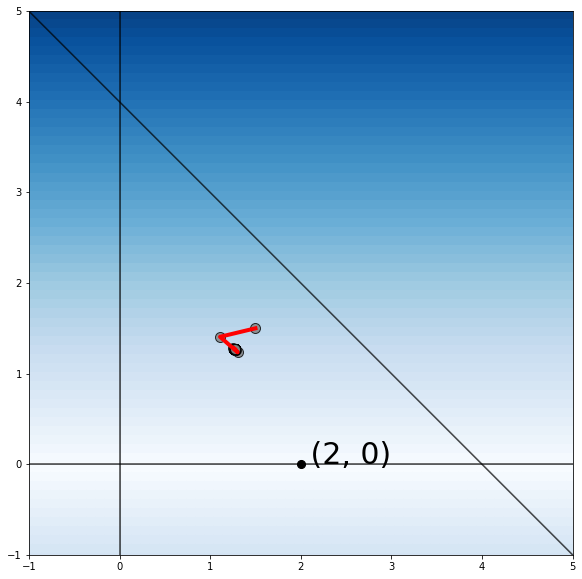

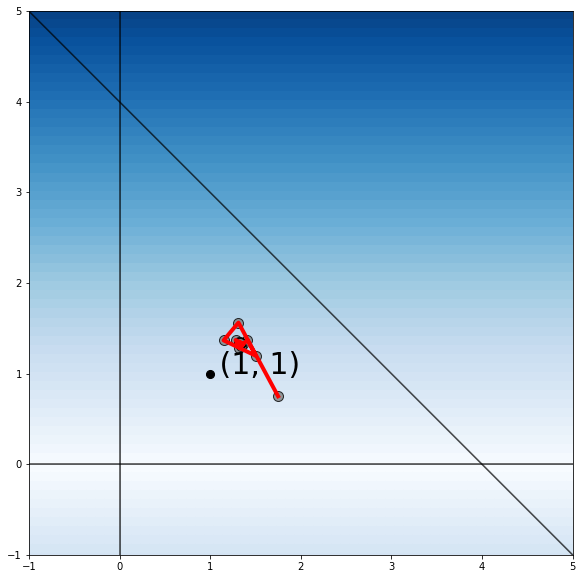

In [454]:
x1, x2 = parseResult('data/lines_5_2_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 6, -1, 5, (5, 2))

x1, x2 = parseResult('data/lines_5_2_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 6, -1, 5, (5, 2))

x1, x2 = parseResult('data/lines_2_0_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (2, 0))

x1, x2 = parseResult('data/lines_2_0_convolution.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (2, 0))

x1, x2 = parseResult('data/lines_1_1_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLines', -1, 5, -1, 5, (1, 1))

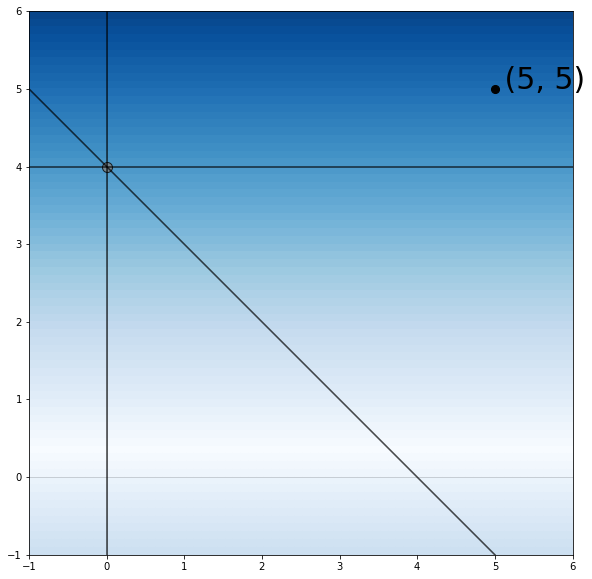

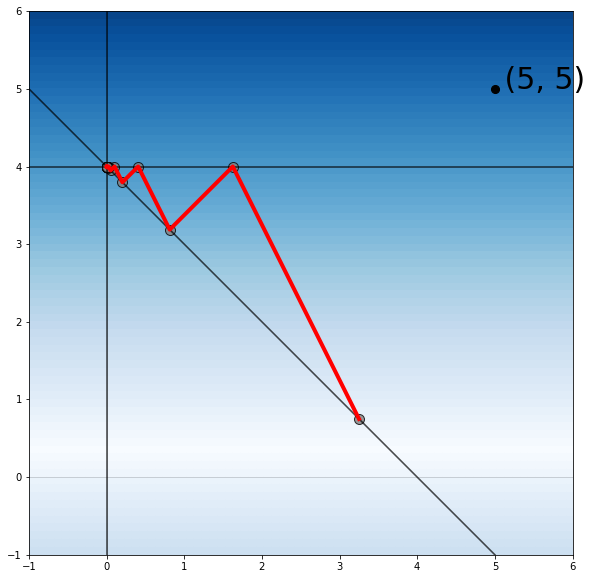

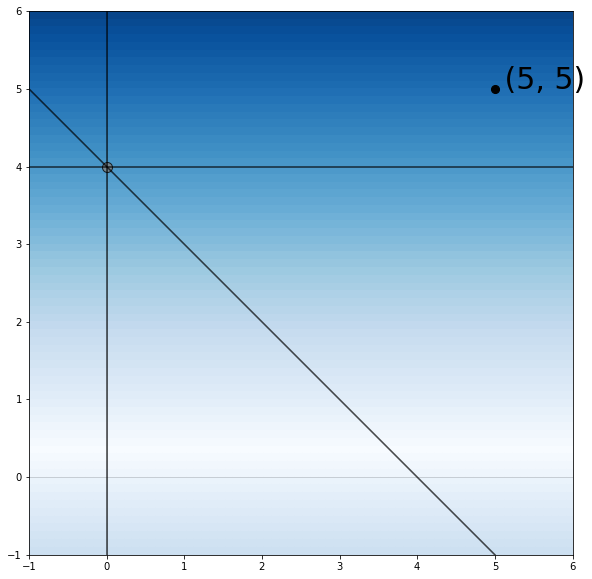

In [455]:
x1, x2 = parseResult('data/lines_with_weight_5_5_symmetrization.txt')
makePlot(x1, x2, 'IntersectingLines_WithWeight', -1, 6, -1, 6, (5, 5))

x1, x2 = parseResult('data/lines_with_weight_5_5_convolution.txt')
makePlot(x1, x2, 'IntersectingLines_WithWeight', -1, 6, -1, 6, (5, 5))

x1, x2 = parseResult('data/lines_with_weight_5_5_excluding_rows.txt')
makePlot(x1, x2, 'IntersectingLines_WithWeight', -1, 6, -1, 6, (5, 5))

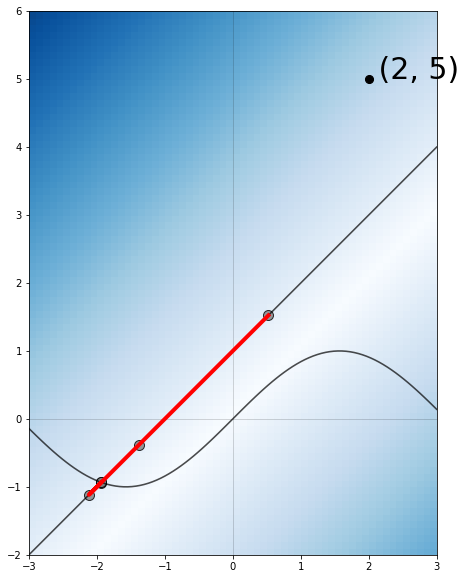

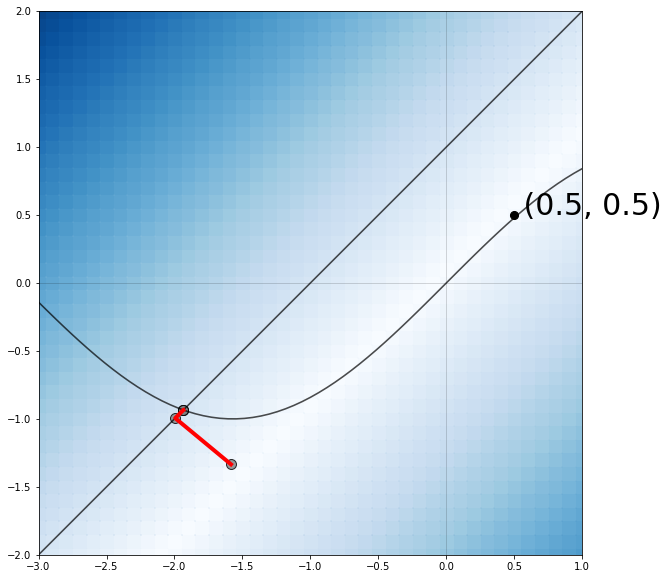

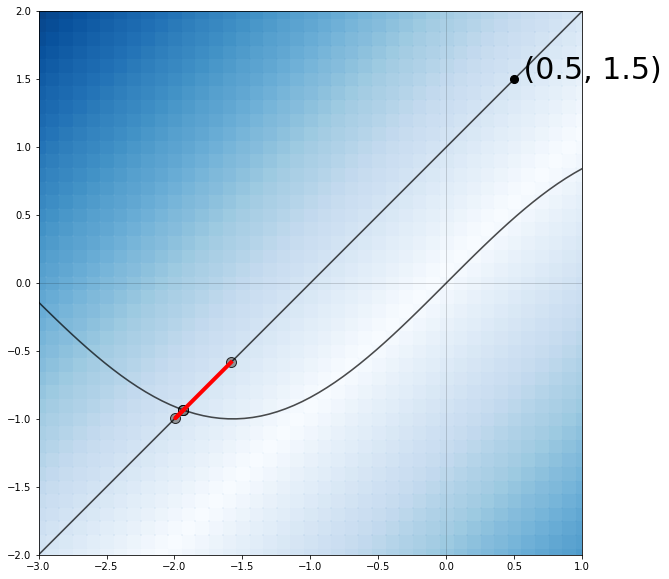

In [456]:
x1, x2 = parseResult('data/sin_wave_2_5.txt')
makePlot(x1, x2,'IntersectingLinesWithSineWave', -3, 3, -2, 6, (2, 5))

x1, x2 = parseResult('data/sin_wave_0_5_0_5.txt')
makePlot(x1, x2, 'IntersectingLinesWithSineWave', -3, 1, -2, 2, (0.5, 0.5))

x1, x2 = parseResult('data/sin_wave_0_5_1_5.txt')
makePlot(x1, x2, 'IntersectingLinesWithSineWave', -3, 1, -2, 2, (0.5, 1.5))